<a name="1"></a>
## 1 - Packages 

- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from util import *
import copy
import math
%matplotlib inline

## 2 - Dataset

You will start by loading the dataset for this task. 
- The `pd.read_csv()` function shown below loads the data into `gold_data`

In [ ]:
gold_data = pd.read_csv('/content/gold price dataset.csv')

## 3 - Functions on Dataset
`.head()` function will show first five column of our dataset.

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of `gold_data` and see how many examples you have in your dataset.

In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info

<bound method DataFrame.info of            Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]>

- The `gold_data['column_name']` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the Silver Prices data
  - `y_train` is the Gold Prices data

In [ ]:
x_train = gold_data['SLV']
y_train = gold_data['GLD']

In [ ]:
print(x_train)

0       15.1800
1       15.2850
2       15.1670
3       15.0530
4       15.5900
         ...   
2285    15.5100
2286    15.5300
2287    15.7400
2288    15.5600
2289    15.4542
Name: SLV, Length: 2290, dtype: float64


Please print the shape of `x_train` and `y_train` and see how many training examples you have in your dataset.

In [ ]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (2290,)
The shape of y_train is:  (2290,)
Number of training examples (m): 2290


#### Visualize your data

It is often useful to understand the data by visualizing it. 
- For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (Gold Prices and Silver Prices).

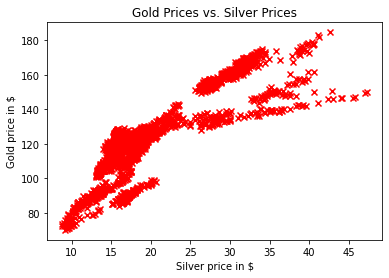

In [ ]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Gold Prices vs. Silver Prices")
# Set the y-axis label
plt.ylabel('Gold price in $')
# Set the x-axis label
plt.xlabel('Silver price in $')
plt.show()

<a name="5"></a>
## 4 - Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

Please complete the `compute_cost()` function below to compute the cost $J(w,b)$.

In [ ]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Silver prices)
        y (ndarray): Shape (m,) Label (Gold prices)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    cost = 0
    ### START CODE HERE ###  
    for i in range(m):
        f_wb = w * x[i] + b
        cost  = cost + (f_wb - y[i])**2
        total_cost = 1/(2*m) * cost
    ### END CODE HERE ### 

    return total_cost

In [ ]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
# from public_tests import *
# compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 3411.652


<a name="6"></a>
## 5 - Gradient descent 

In this section, you will implement the gradient for parameters $w, b$ for linear regression. 

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

In [ ]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Silver price) 
      y (ndarray): Shape (m,) Label (Gold price)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ### 
    for i in range(m):
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

In [ ]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): -2608.141322027062 -122.73287507292564


In [ ]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -2513.386398996699 -118.51587575589488


<a name="2.6"></a>
###  Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [ ]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 750
alpha = 0.0001

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost  7136.37   
Iteration   75: Cost   309.99   
Iteration  150: Cost   303.24   
Iteration  225: Cost   302.84   
Iteration  300: Cost   302.45   
Iteration  375: Cost   302.06   
Iteration  450: Cost   301.67   
Iteration  525: Cost   301.28   
Iteration  600: Cost   300.89   
Iteration  675: Cost   300.51   
w,b found by gradient descent: 5.714288348070709 0.7938964177512446


In [ ]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Text(0.5, 0, 'Silver Prices')

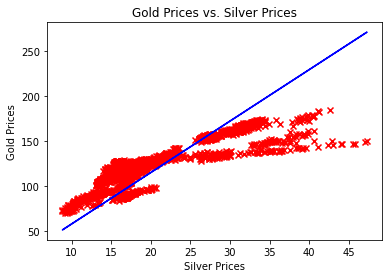

In [ ]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Gold Prices vs. Silver Prices")
# Set the y-axis label
plt.ylabel('Gold Prices')
# Set the x-axis label
plt.xlabel('Silver Prices')

Your final values of $w,b$ can also be used to make predictions on Gold Prices. Let's predict what the Gold Prices would be for Silver Prices of `15$` and `27$`. 

- The model takes in Silver Prices as input. 

In [ ]:
predict1 = 15 * w + b
print('For Silver Price = 15$ , we predict a Gold Price of $%.2f' % (predict1))

predict2 = 27 * w + b
print('For population = 27$ , we predict a Gold Price of $%.2f' % (predict2))

For Silver Price = 15$ , we predict a Gold Price of $86.51
For population = 27$ , we predict a Gold Price of $155.08
